In [1]:
# lets read the dataset from the pytorch library
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
training_data   = torchvision.datasets.MNIST(root="../data/", train=True, download=True)
test_data = torchvision.datasets.MNIST(root="../data/", train=False, download=True)

Here ->  0
Here ->  1
Here ->  2
Here ->  3
Here ->  4
Here ->  5
Here ->  6
Here ->  7
Here ->  8
Here ->  9


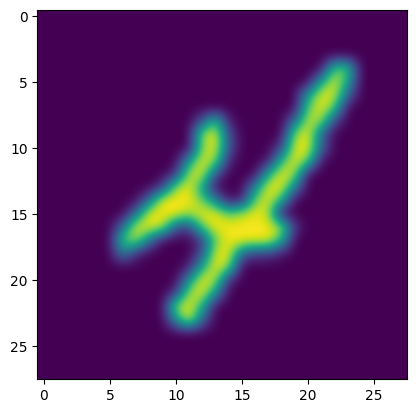

In [5]:
for i in range(10):
    print("Here -> ", i, )
    plt.imshow(training_data[i][0], interpolation="bicubic")

In [2]:
# view image from custom source
from PIL import Image


In [4]:
my_bird = Image.open("../data/myset/bird.jpg", "r")
type(my_bird)

PIL.JpegImagePlugin.JpegImageFile

In [7]:
# convert image to tensor
convert_to_tensor = transforms.ToTensor()
reshape_image = transforms.Resize((128, 128))
my_bird_reshaped = reshape_image(my_bird)
my_bird_tensor = convert_to_tensor(my_bird_reshaped)
my_bird_tensor.shape

torch.Size([3, 128, 128])

In [8]:
my_bird_back_to_image = transforms.ToPILImage()(my_bird_tensor)

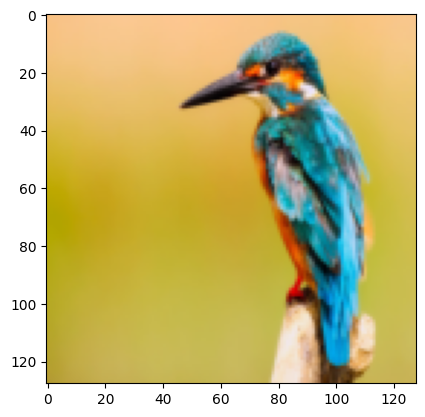

In [9]:
plt.imshow(my_bird_back_to_image)

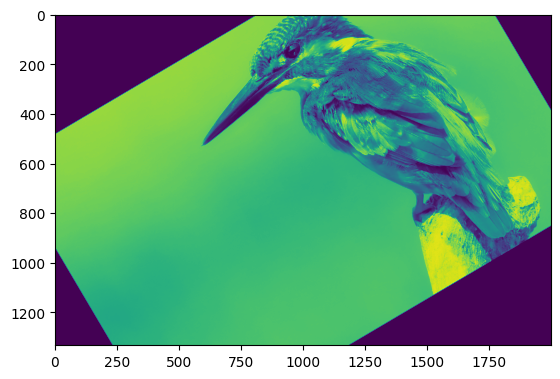

In [17]:
# plt.imshow(my_bird)
rotatedImage = transforms.RandomRotation(degrees=360)(my_bird)
grayScaled = transforms.Grayscale()(rotatedImage)
plt.imshow(grayScaled)

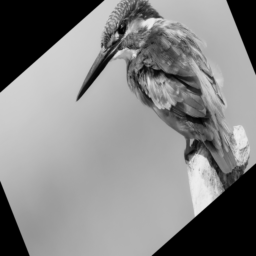

In [35]:
grayScaledTensor = transforms.ToTensor()(grayScaled)
grayScaledTensorImage = transforms.ToPILImage()(grayScaledTensor)
scaledGrayScaledTensorImage = transforms.Resize((256, 256))(grayScaledTensorImage)
scaledGrayScaledTensorImage

In [53]:
transformations = transforms.Compose([transforms.Resize((128, 128)), transforms.ToTensor()])
training_data = torchvision.datasets.CIFAR100(root="../data/", train=True, transform=transformations, download=True)
test_data = torchvision.datasets.CIFAR100(root="../data/", train=False, transform=transformations, download=True)

Files already downloaded and verified
Files already downloaded and verified


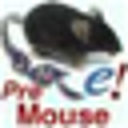

In [57]:
image = transforms.ToPILImage()(test_data.data[1500])
image.resize((128, 128))


In [59]:
targsts = set(training_data.targets)
targsts

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99}

In [90]:
import torch

batch_size = 4
num_workers = 2

# create dataloaders for training and testing data
trainingLoader = torch.utils.data.DataLoader(training_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)
testLoader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=num_workers)

In [93]:
image, label = next(iter(trainingLoader))
image.shape

torch.Size([4, 3, 128, 128])

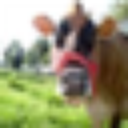

In [65]:
pictureImage = transforms.ToPILImage()(image)
pictureImage

In [85]:
from torch import nn
import torch.nn.functional as F


# implementation of neural network architecture
class MyCustomNetwork(nn.Module):
    
    
    def __init__(self, *args, **kwargs):
        super(MyCustomNetwork, self).__init__(*args, **kwargs)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(in_features=(53824), out_features=120)
        self.fc2 = nn.Linear(in_features=(120), out_features=120)
        self.fc3 = nn.Linear(in_features=(120), out_features=100)
    
    def forward(self, x):
        x = self.pool(F.relu(input=self.conv1(x)))
        x = self.pool(F.relu(input=self.conv2(x)))
        x = x.view(-1, 53824)
        x = F.relu(input=self.fc1(x))
        x = F.relu(input=self.fc2(x))
        x = self.fc3(x)
        
        return(x)

In [81]:
print(MyCustomNetwork())

MyCustomNetwork(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=100, bias=True)
)


In [96]:
class ModelTrainer:
    def __init__(self, dataloader, criterion, optimizer):
        self.criterion = criterion
        self.optimizer = optimizer
        self.dataloader = dataloader
        
        
    def train(self, num_epochs, model):
        for epoch in range(num_epochs):
            self._train_model(epoch, model)
                    
        print("Training Completed.")
        return model
    
    def _train_model(self, epoch_num, model):
        for i, data in enumerate(self.dataloader, 0):
            input, labels = data
            print("The shape of the input is ", labels.shape)
            self.optimizer.zero_grad()
            output = model(input)
            print("The output of the model is ", output.shape)
            loss = self.criterion(output, labels)
            loss.backward()
            self.optimizer.step()
            
            if i%2000 == 1999:
                self._print_loss(epoch_num, i, loss.item())
            
    
    def _print_loss(self, epoch, index, loss):
        loss = loss / 2000
        print('[%d, %5d] loss: %.3f' % (epoch + 1, index + 1, loss))


In [97]:
model = MyCustomNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

trainer = ModelTrainer(trainingLoader, criterion, optimizer)
model = trainer.train(3, model)

The shape of the input is  torch.Size([4])
The output of the model is  torch.Size([1, 100])


ValueError: Expected input batch_size (1) to match target batch_size (4).